In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My\ Drive

/content/drive/My Drive


In [0]:
#ls

In [0]:
#!pip install split-folders

In [0]:
#!mkdir COVProcDataset

In [0]:
import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
split_folders.ratio('COVD19Data', output="COVProcDataset", seed=1337, ratio=(.8, .1, .1)) # default values

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, load_img
# basic parameters set before data generattor
img_width = 150
img_height = 150

train_data_dir = 'COVProcDataset/train'
validation_data_dir = 'COVProcDataset/test'
#train_samples = 720
#validation_samples = 74
epochs = 5
batch_size = 20

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

Using TensorFlow backend.


In [0]:
# Data Augmentation is a method of artificially creating a new dataset for training from 
# the existing training dataset to improve the performance of deep learning neural network 
# with the amount of data available. It is a form of regularization which makes our model generalize better 
# than before.

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
# this is the augmentation configuration we will use for testing:
# only rescaling, avoiding having same training and validation data.
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 596 images belonging to 2 classes.


In [0]:
train_samples=596


In [6]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 77 images belonging to 2 classes.


In [0]:
validation_samples=77

In [0]:
print(train_generator.class_indices)

{'CT_COVID': 0, 'CT_NonCOVID': 1}


In [0]:
imgs, labels = next(train_generator)
print(imgs.shape)
print(labels.shape)

(20, 150, 150, 3)
(20,)


In [0]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

20
0.0


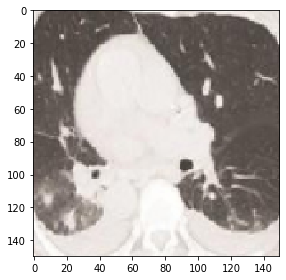

0.0


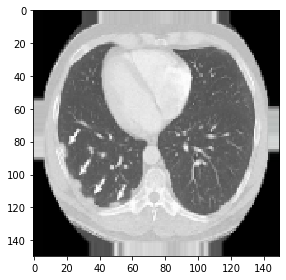

0.0


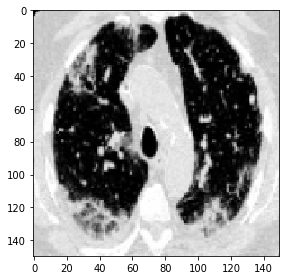

0.0


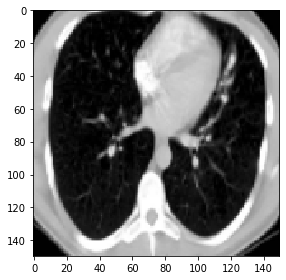

1.0


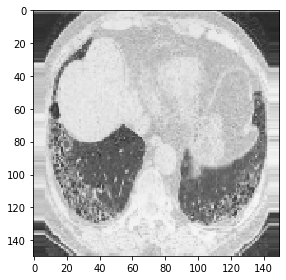

1.0


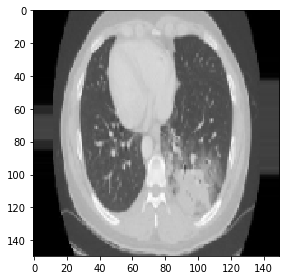

0.0


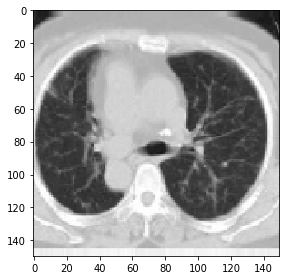

0.0


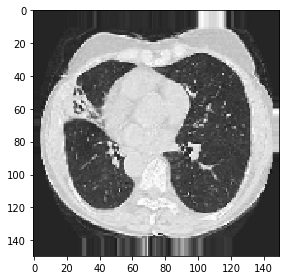

1.0


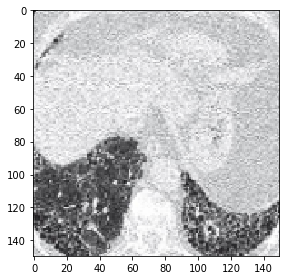

1.0


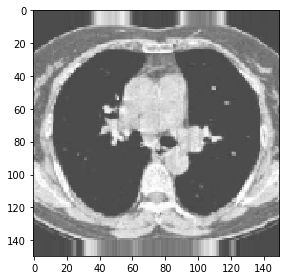

0.0


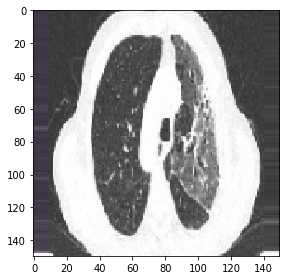

0.0


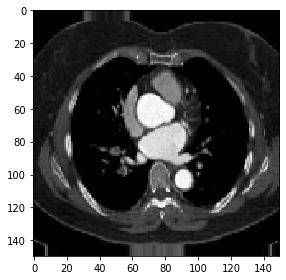

1.0


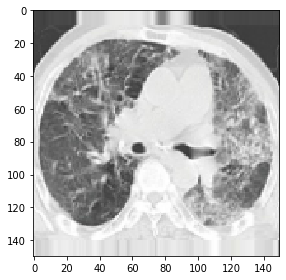

1.0


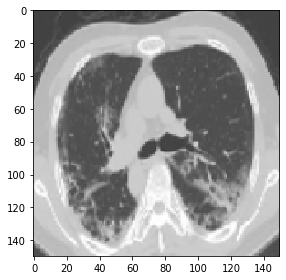

1.0


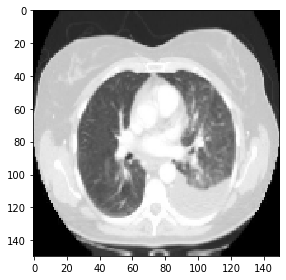

1.0


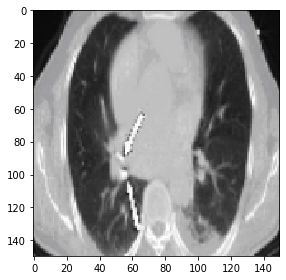

1.0


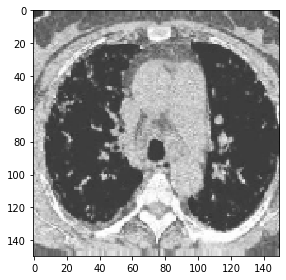

0.0


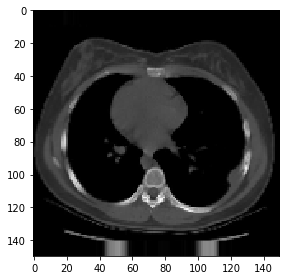

1.0


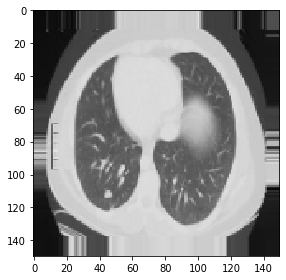

0.0


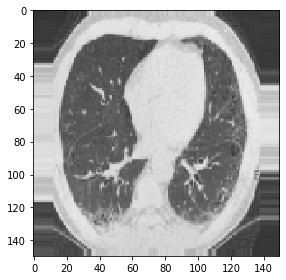

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [0]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 74 images belonging to 2 classes.


In [0]:
IMG_SIZE=160
model = tf.keras.Sequential([
      
    tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', activation='relu', input_shape=[IMG_SIZE,IMG_SIZE, 3]),
    tf.keras.layers.Conv2D(kernel_size=3, filters=30, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=60, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=90, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=110, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=130, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=40, padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1,'sigmoid')
])
 
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.save('myfirstmodel.h5')
loaded_model = tf.keras.models.load_model('myfirstmodel.h5')
loaded_model.layers[0].input_shape #(None, 160, 160, 3)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
#Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
Y_pred = model.predict_generator(validation_generator, 77// batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
#pred = model.predict_generator(validation_generator, steps=len(validation_generator), verbose=0)
# Get classes by max element in np (as a list)
y_pred = np.argmax(pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['COVD19', 'NONCOV19']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [0]:
## Now Predict
from os import listdir
from os.path import isfile, join
predict_dir_path='COVProcDataset/test/CT_COVID'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

In [0]:
# predicting images
from keras.preprocessing import image
import os
import numpy as np
from keras.preprocessing import image
CT_COVID_counter = 0 
CT_NonCOVID  = 0
for file in onlyfiles:
    img = image.load_img(os.path.join(predict_dir_path,file), target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'CT_COVID')
        CT_COVID_counter += 1
    else:
        print(file + ": " + 'CT_NonCOVID')
        CT_NonCOVID += 1
print("CT_COVID :",CT_COVID_counter)
print("CT_NonCOVID :",CT_NonCOVID)

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('COV19dataset/Trainingdataset/CT_COVID/0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='augmentationfolder', save_prefix='CT_COVID', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [0]:
#!mkdir augmentationfolder

['CT_COVID_0_6358.jpeg', 'CT_COVID_0_9290.jpeg', 'CT_COVID_0_684.jpeg', 'CT_COVID_0_968.jpeg', 'CT_COVID_0_144.jpeg', 'CT_COVID_0_5350.jpeg', 'CT_COVID_0_9014.jpeg', 'CT_COVID_0_1138.jpeg', 'CT_COVID_0_5980.jpeg', 'CT_COVID_0_9334.jpeg', 'CT_COVID_0_6170.jpeg', 'CT_COVID_0_4579.jpeg', 'CT_COVID_0_167.jpeg', 'CT_COVID_0_3349.jpeg', 'CT_COVID_0_5673.jpeg', 'CT_COVID_0_293.jpeg', 'CT_COVID_0_2434.jpeg', 'CT_COVID_0_9435.jpeg', 'CT_COVID_0_9200.jpeg', 'CT_COVID_0_5049.jpeg', 'CT_COVID_0_1280.jpeg']
CT_COVID_0_6358.jpeg
CT_COVID_0_9290.jpeg
CT_COVID_0_684.jpeg
CT_COVID_0_968.jpeg
CT_COVID_0_144.jpeg
CT_COVID_0_5350.jpeg
CT_COVID_0_9014.jpeg
CT_COVID_0_1138.jpeg
CT_COVID_0_5980.jpeg
CT_COVID_0_9334.jpeg
CT_COVID_0_6170.jpeg
CT_COVID_0_4579.jpeg
CT_COVID_0_167.jpeg
CT_COVID_0_3349.jpeg
CT_COVID_0_5673.jpeg
CT_COVID_0_293.jpeg
CT_COVID_0_2434.jpeg
CT_COVID_0_9435.jpeg
CT_COVID_0_9200.jpeg
CT_COVID_0_5049.jpeg
CT_COVID_0_1280.jpeg


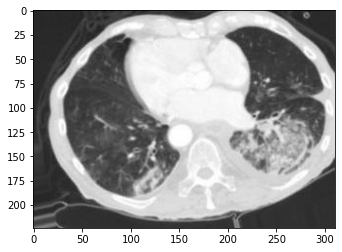

In [0]:
import os
import cv2
import matplotlib.pyplot as plt
path='augmentationfolder'
pathlist=os.listdir(path)
print(pathlist)
for i in pathlist:
  print(i)
  img=cv2.imread(os.path.join(path,i))
  plt.imshow(img)


In [0]:
import os
 
import numpy as np
 
import matplotlib.pyplot as plt
 
import tensorflow as tf
 
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
IMG_SIZE=150
batch_holder = np.zeros((21, IMG_SIZE, IMG_SIZE, 3))
img_dir='augmentationfolder/'
for i,img in enumerate(os.listdir(img_dir)):
  img = image.load_img(os.path.join(img_dir,img), target_size=(IMG_SIZE,IMG_SIZE))
  batch_holder[i, :] = img

print(len(batch_holder))

21


In [0]:
IMG_SIZE=160
model = tf.keras.Sequential([
      
    tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', activation='relu', input_shape=[IMG_SIZE,IMG_SIZE, 3]),
    tf.keras.layers.Conv2D(kernel_size=3, filters=30, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=60, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=90, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=110, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=130, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=40, padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1,'sigmoid')
])
 
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:

#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
6/6 [==============================] - 46s 8s/step - loss: 0.7193 - accuracy: 0.4417 - val_loss: 0.6932 - val_accuracy: 0.5500
Epoch 2/5
6/6 [==============================] - 46s 8s/step - loss: 0.6910 - accuracy: 0.5167 - val_loss: 0.6894 - val_accuracy: 0.5500
Epoch 3/5
6/6 [==============================] - 45s 8s/step - loss: 0.7019 - accuracy: 0.4167 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 4/5
6/6 [==============================] - 47s 8s/step - loss: 0.6929 - accuracy: 0.5333 - val_loss: 0.6911 - val_accuracy: 0.6000
Epoch 5/5
6/6 [==============================] - 42s 7s/step - loss: 0.6946 - accuracy: 0.4750 - val_loss: 0.6932 - val_accuracy: 0.5000


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


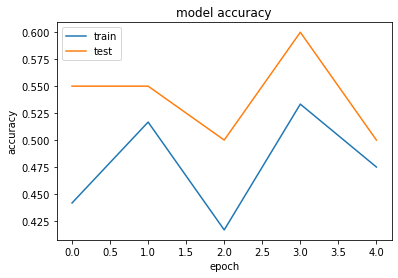

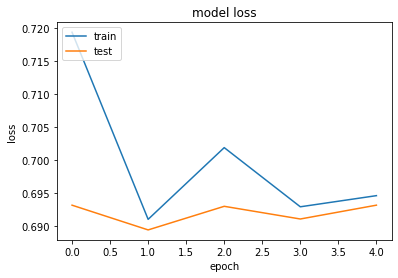

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.save('myfirstmodel.h5')

In [0]:
loaded_model = tf.keras.models.load_model('myfirstmodel.h5')
loaded_model.layers[0].input_shape #(None, 160, 160, 3)

(None, 160, 160, 3)

[[0.49061707]
 [0.49124837]
 [0.49197844]
 [0.4910573 ]
 [0.49190417]
 [0.49163288]
 [0.4910429 ]
 [0.4920971 ]
 [0.4916043 ]
 [0.49053416]
 [0.4920355 ]
 [0.4919856 ]
 [0.49125457]
 [0.49190134]
 [0.49061397]
 [0.4922211 ]
 [0.4910573 ]
 [0.49131522]
 [0.49109846]
 [0.49190104]]


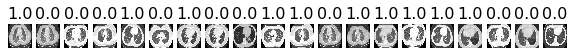

In [0]:
pred = model.predict_generator(validation_generator, steps=len(validation_generator), verbose=0)
# Get classes by max element in np (as a list)
classes = list(np.argmax(pred, axis=1))
#print(classes)
testimages,labelstest=next(validation_generator)
plots(testimages,titles=labelstest)
predictions=model.predict_generator(validation_generator, steps=1,verbose=0)
print(predictions)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
#Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
Y_pred = model.predict_generator(validation_generator, 74 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
#pred = model.predict_generator(validation_generator, steps=len(validation_generator), verbose=0)
# Get classes by max element in np (as a list)
y_pred = np.argmax(pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Cats', 'Dogs']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


Confusion Matrix
[[37  0]
 [37  0]]
Classification Report
              precision    recall  f1-score   support

        Cats       0.50      1.00      0.67        37
        Dogs       0.00      0.00      0.00        37

    accuracy                           0.50        74
   macro avg       0.25      0.50      0.33        74
weighted avg       0.25      0.50      0.33        74



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
len(validation_generator)

4

NameError: ignored

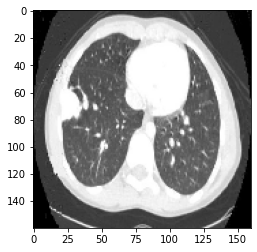

In [0]:
image_path="COV19dataset/testingdataset/CT_COVID/1576.png"
img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=loaded_model.predict_classes(img)
plt.title(get_label_name(result[0][0]))
plt.show()

In [0]:
## Now Predict
from os import listdir
from os.path import isfile, join
predict_dir_path='COV19dataset/testingdataset/CT_COVID'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['1702.png', '1814.png', '1638.png', '1858.png', '1857.png', '1846.png', '1859.png', '2041.png', '2040.png', '2039.png', '2007.png', '1952.png', '1924.png', '1923.png', '1922.png', '1921.png', '1920.png', '1919.png', '1889.png', '1888.png', '2237.png', '2145.png', '2144.png', '2143.png', '2142.png', '2141.png', '2140.png', '2139.png', '2138.png', '2108.png', '2341.png', '1845.png', '1868.png', '1576.png', '1577.png', '1876.png', '1877.png']


In [0]:
# predicting images
from keras.preprocessing import image
import os
import numpy as np
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(os.path.join(predict_dir_path,file), target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    print(classes)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [0]:
# predicting images
from keras.preprocessing import image
import os
import numpy as np
from keras.preprocessing import image
CT_COVID_counter = 0 
CT_NonCOVID  = 0
for file in onlyfiles:
    img = image.load_img(os.path.join(predict_dir_path,file), target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'CT_COVID')
        CT_COVID_counter += 1
    else:
        print(file + ": " + 'CT_NonCOVID')
        CT_NonCOVID += 1
print("CT_COVID :",CT_COVID_counter)
print("CT_NonCOVID :",CT_NonCOVID)

1702.png: CT_COVID
1814.png: CT_COVID
1638.png: CT_COVID
1858.png: CT_COVID
1857.png: CT_COVID
1846.png: CT_COVID
1859.png: CT_COVID
2041.png: CT_COVID
2040.png: CT_COVID
2039.png: CT_COVID
2007.png: CT_COVID
1952.png: CT_COVID
1924.png: CT_COVID
1923.png: CT_COVID
1922.png: CT_COVID
1921.png: CT_COVID
1920.png: CT_COVID
1919.png: CT_COVID
1889.png: CT_COVID
1888.png: CT_COVID
2237.png: CT_COVID
2145.png: CT_COVID
2144.png: CT_COVID
2143.png: CT_COVID
2142.png: CT_COVID
2141.png: CT_COVID
2140.png: CT_COVID
2139.png: CT_COVID
2138.png: CT_COVID
2108.png: CT_COVID
2341.png: CT_COVID
1845.png: CT_COVID
1868.png: CT_COVID
1576.png: CT_COVID
1577.png: CT_COVID
1876.png: CT_COVID
1877.png: CT_COVID
CT_COVID : 37
CT_NonCOVID : 0


In [0]:
model = tf.keras.Sequential([
      
    tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', activation='relu', input_shape=[IMG_SIZE,IMG_SIZE, 3]),
    tf.keras.layers.Conv2D(kernel_size=3, filters=30, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=60, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=90, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=110, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=130, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=40, padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1,'sigmoid')
])
 
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
 

In [0]:
history = model.fit(train_batches,
                    epochs=5,
                    validation_data=validation_batches)

In [0]:
loaded_model = tf.keras.models.load_model('dog_cat_model.h5')
loaded_model.layers[0].input_shape #(None, 160, 160, 3)

In [0]:
batch_holder = np.zeros((20, IMG_SIZE, IMG_SIZE, 3))
img_dir='test_set/'
for i,img in enumerate(os.listdir(img_dir)):
  img = image.load_img(os.path.join(img_dir,img), target_size=(IMG_SIZE,IMG_SIZE))
  batch_holder[i, :] = img

In [0]:
def plots(ims, figsize=(10,6), rows=1,interp=False,titles=None):
  if type(ims[0]) is np.ndarray:
    ims=np.array(ims).astype(np.float32)
    if (ims.shape[-1]!=3):
      ims=ims.transpose(0,2,3,1)
    f=plt.figure(figsize=figsize)
    cols=len(ims)//rows if len(ims)%2==0 else len(ims)//rows+1
    for i in range(len(ims)):
      sp=f.add_subplot(rows,cols,i+1)
      sp.axis("off")
      if titles is not None:
        sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
    

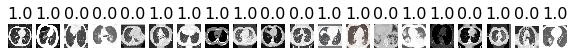

In [0]:
plots(imgs, titles=labels)

In [0]:
labelstest=labels
print(labelstest)

[1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]
